<a href="https://colab.research.google.com/github/np03cs4s250092-commits/AI_Final_Assignment/blob/main/2548321_Rejina_Rana_Magar_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Import Libraries

In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor


from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_selection import SequentialFeatureSelector


#2.Load Dataset





In [19]:
df = pd.read_csv("/content/drive/MyDrive/AB_NYC_2019.csv")

In [20]:
df.isnull().sum()


,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [21]:
df.drop(columns=["id", "name", "host_name", "last_review"], inplace=True)


In [22]:
# Handle missing values safely
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)


In [23]:
df.isnull().sum()


,0
host_id,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0
number_of_reviews,0
reviews_per_month,0


In [24]:
df.drop_duplicates(inplace=True)


In [25]:
df["price"].describe()


,price
count,48895.000000
mean,152.720687
std,240.154170
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


In [26]:
df = df[(df["price"] > 0) & (df["price"] < 1000)]


In [27]:
df = pd.get_dummies(
    df,
    columns=["neighbourhood_group", "neighbourhood", "room_type"],
    drop_first=True
)


In [28]:
df.describe()


,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.858600e+04,48586.000000,48586.000000,48586.000000,48586.000000,48586.000000,48586.000000,48586.000000,48586.000000
mean,6.763733e+07,40.728927,-73.952031,140.269049,6.974931,23.372803,1.095313,7.168670,112.365928
std,7.860718e+07,0.054580,0.046156,112.899316,20.276877,44.651661,1.599884,33.046098,131.383634
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.831209e+06,40.690002,-73.982950,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.084879e+07,40.722960,-73.955580,105.000000,3.000000,5.000000,0.380000,1.000000,44.000000
75%,1.074344e+08,40.763130,-73.936100,175.000000,5.000000,24.000000,1.600000,2.000000,225.000000
max,2.743213e+08,40.913060,-73.712990,999.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#3 Data Visualizations & Interpretation
##3.1 Price Distribution

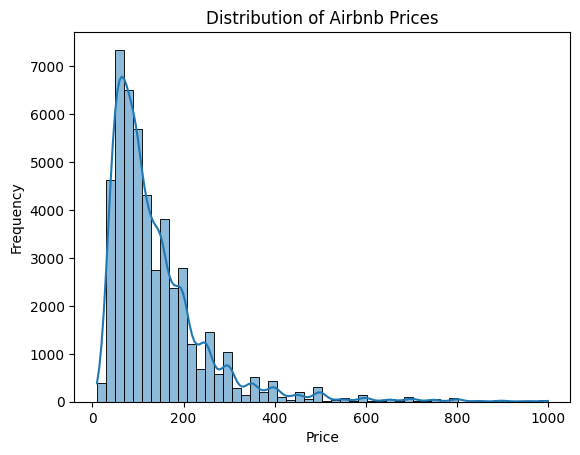

In [71]:

plt.figure()
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribution of Airbnb Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.savefig("price_distribution.png")
plt.show()


###3.2 Price vs Room Type

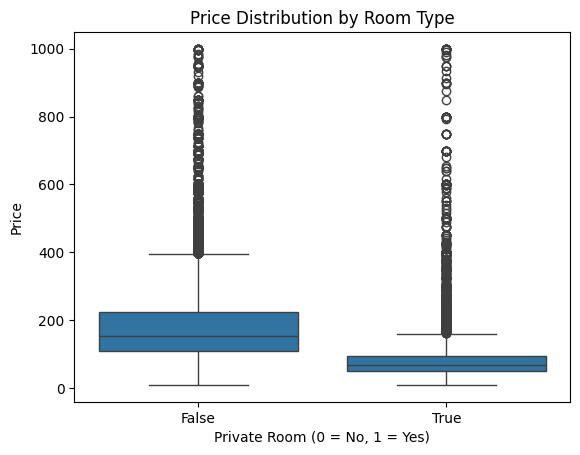

In [72]:

plt.figure()
sns.boxplot(x="room_type_Private room", y="price", data=df)
plt.title("Price Distribution by Room Type")
plt.xlabel("Private Room (0 = No, 1 = Yes)")
plt.ylabel("Price")
plt.savefig("price_vs_room_type.png")
plt.show()


###3.3 Price vs Neighbourhood Group

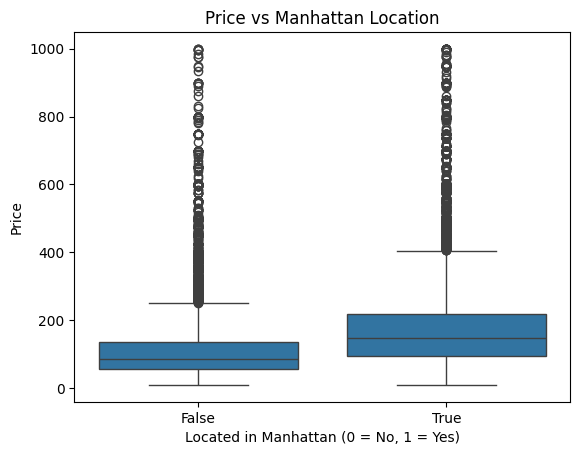

In [73]:

plt.figure()
sns.boxplot(x="neighbourhood_group_Manhattan", y="price", data=df)
plt.title("Price vs Manhattan Location")
plt.xlabel("Located in Manhattan (0 = No, 1 = Yes)")
plt.ylabel("Price")
plt.savefig("price_vs_neighbourhood_group.png")
plt.show()


###3.4 Price vs Number of Reviews

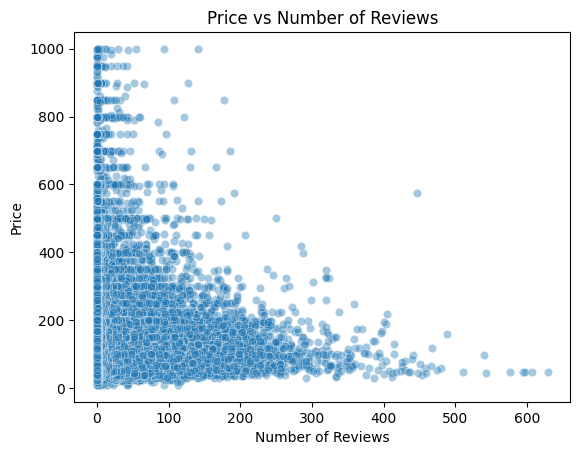

In [74]:

plt.figure()
sns.scatterplot(x="number_of_reviews", y="price", data=df, alpha=0.4)
plt.title("Price vs Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.savefig("price_vs_number_of_reviews.png")
plt.show()


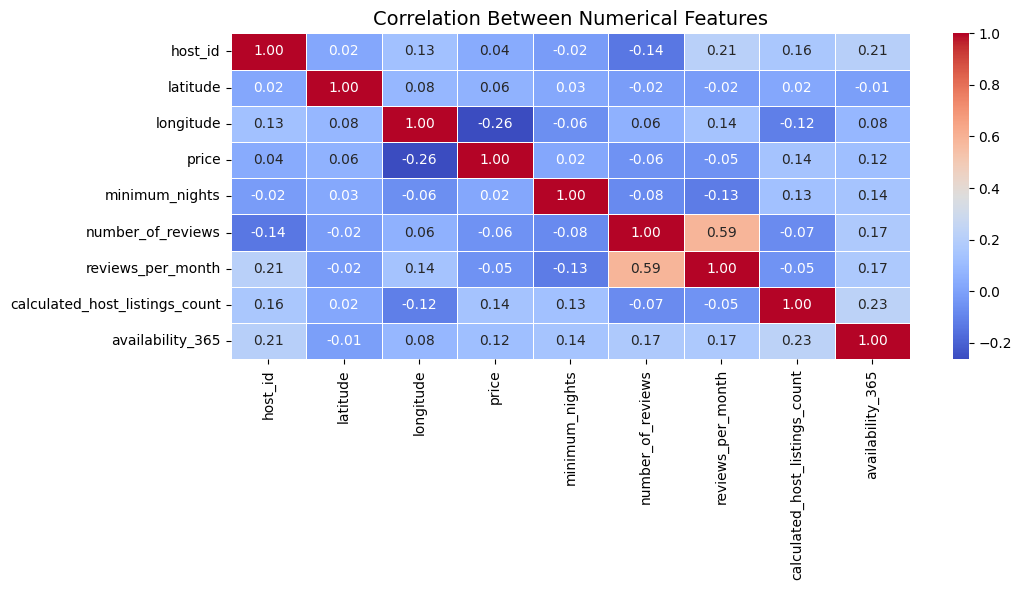

In [75]:
# Automatically get numerical columns
num_features = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(11,6))

sns.heatmap(
    num_features.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linecolor="white",
    linewidths=0.4
)

plt.title("Correlation Between Numerical Features", fontsize=14)
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()


In [34]:
# Target variable
y = df['price']

# Feature variables
X = df.drop(columns=['price'])


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [38]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Neural Network Model

In [39]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)


In [40]:
#train the Model
mlp.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)

In [43]:
#Evaluate on Test Data
y_test_pred = mlp.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Test Accuracy: 0.0809837415105989
              precision    recall  f1-score   support

          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2
          20       0.33      0.14      0.20         7
          21       0.00      0.00      0.00         1
          22       0.50      0.20      0.29         5
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         2
          25       0.29      0.50      0.36        20
          26       0.00      0.00      0.00         6
          27       0.50      0.12      0.20         8
          28       0.17      0.17      0.17         6
          29       0.00      0.00      0.00    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

#Build a Primary Model:

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the model
model1 = LinearRegression()

# Fit the model to the scaled training data
model1.fit(X_train, y_train)

# Predict on the test set
y_pred = model1.predict(X_test)

# Calculate performance metrics
mse_lr= mean_squared_error(y_test, y_pred)
r2_lr= r2_score(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)

print("Linear Regression:")
print(f"Mean Squared Error: {mse_lr:.4f}")
print(f"R-squared: {r2_lr:.4f}")
print(f"Mean Absolute Error: {mae_lr:.4f}")


Linear Regression:
Mean Squared Error: 8158.4226
R-squared: 0.3645
Mean Absolute Error: 53.3631


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


model2 = RandomForestRegressor(n_estimators=100, random_state=42)


model2.fit(X_train, y_train)

y_pred_rf = model2.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Print performance metrics
print("Random Forest Regression:")
print(f"Mean Squared Error: {mse_rf:.4f}")
print(f"R-squared: {r2_rf:.4f}")
print(f"Mean Absolute Error: {mae_rf:.4f}")


Random Forest Regression:
Mean Squared Error: 6962.3936
R-squared: 0.4577
Mean Absolute Error: 47.4270


In [46]:
# Compare the models based on R-squared, MSE, and MAE
if r2_rf > r2_lr:
    print("Random Forest Regressor performed better based on R-squared value.")
else:
    print("Linear Regression performed better based on R-squared value.")

if mse_rf < mse_lr:
    print("Random Forest Regressor performed better based on Mean Squared Error.")
else:
    print("Linear Regression performed better based on Mean Squared Error.")

if mae_rf < mae_lr:
    print("Random Forest Regressor performed better based on Mean Absolute Error.")
else:
    print("Linear Regression performed better based on Mean Absolute Error.")


Random Forest Regressor performed better based on R-squared value.
Random Forest Regressor performed better based on Mean Squared Error.
Random Forest Regressor performed better based on Mean Absolute Error.


In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Hyperparameters for Linear Regression (Ridge is used for regularization)
param_grid_linear = {'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100, 500]}

# Use Ridge Regression as it allows regularization
ridge_model = Ridge()

# Perform GridSearchCV
grid_search_linear = GridSearchCV(estimator=ridge_model, param_grid=param_grid_linear, cv=5, scoring='r2')
grid_search_linear.fit(X_train, y_train)

# Best hyperparameters for Linear Regression
best_params_linear = grid_search_linear.best_params_
print("Best hyperparameters for Linear Regression (Ridge):", best_params_linear)

Best hyperparameters for Linear Regression (Ridge): {'alpha': 500}


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Instantiate model
rf = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV
rf_cv = RandomizedSearchCV(rf, rf_params, cv=5, n_iter=10, scoring='r2', random_state=42)
rf_cv.fit(X_train, y_train)

# Best hyperparameters
print("Best Random Forest Parameters:", rf_cv.best_params_)


Best Random Forest Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': None, 'bootstrap': True}


#5.Feature Selection

In [55]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize model
lr_model = LinearRegression()

# Perform RFE to select the top 5 features
rfe = RFE(estimator=lr_model, n_features_to_select=4)
rfe.fit(X, y)

# Get selected feature names
selected_features = X.columns[rfe.support_]

print("Selected Features Linear Regression:", list(selected_features))


Selected Features Linear Regression: ['room_type_Private room', 'longitude', 'latitude', 'host_id']


In [56]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importance scores
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Select top 5 features
selected_features = feature_importance.head(4).index.tolist()

print("Selected Features for Random Forest model:", selected_features)


Selected Features for Random Forest model: ['longitude', 'latitude', 'host_id', 'room_type_Private room']


#6. Final Model:

In [67]:
# using best  features and target variable for linear regression
features = ['room_type_Private room', 'longitude', 'latitude', 'host_id']
X = df[features]
y = df["price"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Ridge Linear Regression model
linear_model = Ridge(alpha=10)
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model using R², RMSE, and MAE
r2_lr_final = r2_score(y_test, y_pred)
mse_lr_final = mean_squared_error(y_test, y_pred)
mae_lr_final = mean_absolute_error(y_test, y_pred)

# Print evaluation results
print("Final Linear Regression Results:")
print(f"R² Score: {r2_lr_final:.4f}")
print(f"Mean Squared Error (RMSE): {mse_lr_final:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lr_final:.4f}")


Final Linear Regression Results:
R² Score: 0.2494
Mean Squared Error (RMSE): 9636.1067
Mean Absolute Error (MAE): 58.9600


/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.42837e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


In [68]:
print("Linear Regression Result:")
if r2_lr_final > r2_lr:
    print(f"R² improved from {r2_lr:.4f} to {r2_lr_final:.4f}")
else:
    print(f"R² worsened from {r2_lr:.4f} to {r2_lr_final:.4f}")


if mse_lr_final < mse_lr:
    print(f"MSE improved from {mse_lr:.4f} to {mse_lr_final:.4f}")
else:
    print(f"MSE worsened from {mse_lr:.4f} to {mse_lr_final:.4f}")


if mae_lr_final < mae_lr:
    print(f"MAE improved from {mae_lr:.4f} to {mae_lr_final:.4f}")
else:
    print(f"MAE worsened from {mae_lr:.4f} to {mae_lr_final:.4f}")

Linear Regression Result:
R² worsened from 0.3645 to 0.2494
MSE worsened from 8158.4226 to 9636.1067
MAE worsened from 53.3631 to 58.9600


In [69]:
# using best  features and target variable for Random Forest Regressor
features = ['longitude', 'latitude', 'host_id', 'room_type_Private room']

X = df[features]
y=df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(
    n_estimators=50,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features=None,
    max_depth=20,
    bootstrap=True,
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse_rf_final = mean_squared_error(y_test, y_pred)
mae_rf_final = mean_absolute_error(y_test, y_pred)
r2_rf_final = r2_score(y_test, y_pred)

# Print final Random Forest model results
print("Final Random Forest Regressor:")
print("Mean Squared Error (MSE):", mse_rf_final)
print("Mean Absolute Error (MAE):", mae_rf_final)
print("R-squared (R2):", r2_rf_final)

Final Random Forest Regressor:
Mean Squared Error (MSE): 7736.121999777493
Mean Absolute Error (MAE): 51.21373926516622
R-squared (R2): 0.3973830195560435


In [70]:
print("Random Forest Regressor:")
if r2_rf_final > r2_rf:
    print(f"R² improved from {r2_rf:.4f} to {r2_rf_final:.4f}")
else:
    print(f"R² worsened from {r2_rf:.4f} to {r2_rf_final:.4f}")

if mse_rf_final < mse_rf:
    print(f"MSE improved from {mse_rf:.4f} to {mse_rf_final:.4f}")
else:
    print(f"MSE worsened from {mse_rf:.4f} to {mse_rf_final:.4f}")


if mae_rf_final < mae_rf:
    print(f"MAE improved from {mae_rf:.4f} to {mae_rf_final:.4f}")
else:
    print(f"MAE worsened from {mae_rf:.4f} to {mae_rf_final:.4f}")

Random Forest Regressor:
R² worsened from 0.4577 to 0.3974
MSE worsened from 6962.3936 to 7736.1220
MAE worsened from 47.4270 to 51.2137


In [66]:
# -------------------------------
# Final Model Comparison Table
# -------------------------------

comparison_table = pd.DataFrame({
    "Model": [
        "Final Linear Regression (Ridge)",
        "Final Random Forest Regressor"
    ],
    "Features Used": [
        "Selected (4)",
        "Selected (4)"
    ],
    "CV Score": [
        grid_search_linear.best_score_,
        rf_cv.best_score_
    ],
    "Test RMSE": [
        np.sqrt(mse_lr_final),
        np.sqrt(mse_rf_final)
    ],
    "Test R-squared": [
        r2_lr_final,
        r2_rf_final
    ]
})

comparison_table


,Model,Features Used,CV Score,Test RMSE,Test R-squared
0,Final Linear Regression (Ridge),Selected (4),0.370201,98.163673,0.249381
1,Final Random Forest Regressor,Selected (4),0.466200,87.955227,0.397383
